# U16 financial features analysis

## 拿取資料

d:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<AxesSubplot:xlabel='date'>

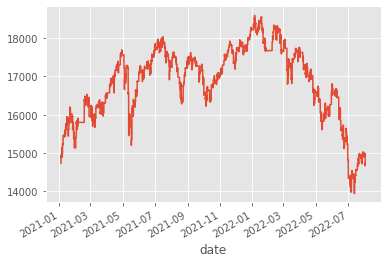

In [1]:
from finlab.data import Data
data = Data()

twii = data.get('發行量加權股價指數')
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]

import matplotlib.pyplot as plt
plt.style.use("ggplot")

twii['2021':].plot()

## 製作features

In [38]:
import talib
import numpy as np
import pandas as pd

import pandas_ta as ta




sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),
    
    'ATR5': talib.ATR(twii, twii, twii, 5),
    'ATR10': talib.ATR(twii, twii, twii, 10),
    'ATR20': talib.ATR(twii, twii, twii, 20),
    'ATR30': talib.ATR(twii, twii, twii, 30),
    'ATR420': talib.ATR(twii, twii, twii, 420),

    
    'return': twii.shift(-10) / twii, # twii.shift(-10) / twii >1
    
})
####
feature_names = list(dataset.columns[:-1])
#dataset['return'] = twii.shift(-10) / twii >1

In [3]:
## 大量跑指標，找出有用的，再上去回測
import finlab.ml as ml

twii_df = pd.DataFrame({
    'open' : twii,
    'high': twii,
    'low': twii,
    "close": twii,
})

#talib.ATR()

indicators = ['STOCH', 'RSI',"ADXR",'ATR']
multiplier = [1,5,10,20,30]
dataset = ml.talib_features(twii_df,indicators, multiplier)
feature_names = dataset.columns
dataset ['return'] = twii.shift(-10) / twii

## 訓練

In [79]:
import lightgbm as lgb


dataset_train = dataset[:'2021']
dataset_test = dataset['2022':]

train = dataset_train[feature_names], dataset_train['return']  > 1
test = dataset_test[feature_names], dataset_test['return']   >1 
#
#gbm.fit( *train )
#gbm.score(*test)

In [83]:
cf_lgbm = lgb.LGBMClassifier(colsample_bytree=0.8831498093118284, metric='None',
                             min_child_samples=169, min_child_weight=1000.0,
                             n_estimators=5000, n_jobs=4, num_leaves=24, random_state=314,
                             reg_alpha=7, reg_lambda=10, subsample=0.8337528884354033)
                             
cf_lgbm.fit(dataset_train[feature_names],dataset_train['return'] > 1) #, **fit_params)
#cf_lgbm( *train )
#cf_lgbm.score(dataset_test[feature_names],dataset_test['return'] > 1)

LGBMClassifier(colsample_bytree=0.8831498093118284, metric='None',
               min_child_samples=169, min_child_weight=1000.0,
               n_estimators=5000, n_jobs=4, num_leaves=24, random_state=314,
               reg_alpha=7, reg_lambda=10, subsample=0.8337528884354033)

In [80]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 500

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

### 執行參數回測
gs.fit(*train, **fit_params)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.533732
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[12]	valid's auc: 0.518743
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[5]	valid's auc: 0.529072
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[6]	valid's auc: 0.541728
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.55084
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.550246
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
Early stopping, be

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314),
                   n_iter=500,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A34B57648>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A34B6EFC8>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A34AD4348>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
         

In [82]:
gs.best_estimator_

LGBMClassifier(colsample_bytree=0.8831498093118284, metric='None',
               min_child_samples=169, min_child_weight=1000.0,
               n_estimators=5000, n_jobs=4, num_leaves=24, random_state=314,
               reg_alpha=7, reg_lambda=10, subsample=0.8337528884354033)

In [73]:
gs.score(*test)

0.5397744911312321

In [9]:
#train = (dataset_train[feature_names], dataset_train['return'] >1   )#>1
#test = (dataset_test[feature_names], dataset_test['return']    ) #>1
#
#cf_lgbm.fit(*train)
#cf_lgbm.score(*test)

In [10]:
dataset_train['return'].sort_values(ascending=False)

date
2008-10-28 11:30:00    1.087726
2008-10-28 12:00:00    1.074446
2008-10-28 11:45:00    1.072267
2008-09-18 12:15:00    1.069033
2008-09-18 12:30:00    1.068048
                         ...   
2015-08-21 12:45:00    0.929703
2020-03-18 13:15:00    0.928266
2020-03-12 12:00:00    0.928113
2020-03-12 11:45:00    0.927397
2008-11-05 11:30:00    0.924507
Name: return, Length: 70395, dtype: float64

<AxesSubplot:>

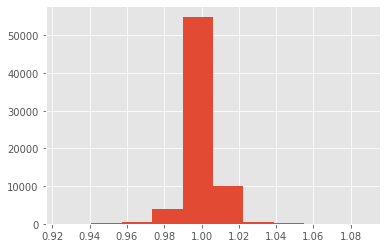

In [11]:
dataset_train['return'].hist()

In [12]:
(dataset_train['return']>1).sum() / len(dataset)

0.47701793000476245

In [34]:
cf_lgbm.fit(*train)

LGBMClassifier(colsample_bytree=0.7756038066515227, metric='None',
               min_child_samples=424, min_child_weight=10000.0,
               n_estimators=5000, n_jobs=4, num_leaves=30, random_state=314,
               reg_alpha=0, reg_lambda=100, subsample=0.9348658101450167)

In [35]:
gs.score(*test)

0.5

In [75]:
(cf_lgbm.feature_importances_,feature_names)

(array([ 26,  23,  46,  24,  49,  70,  89, 142,  79, 119, 112,  82,  72,
        106,  28,  16,  33,  91,  24,  56,  38,  38,  18,  55,  25,  19,
         39,  54,  39,  46,  69,  46,  84, 112,  50, 136, 134, 145, 102,
        103, 150,  65,  20,  44,  56, 117]),
 ['RSIb',
  'RSIb2',
  'RSIb3',
  'RSIb4',
  'RSIb5',
  'RSIb6',
  'KDb',
  'KDb2',
  'KDb3',
  'KDb4',
  'KDb5',
  'KDb6',
  'KDb7',
  'KDb8',
  'a5',
  'a10',
  'a20',
  'a40',
  'a80',
  'a160',
  'a320',
  'a640',
  'a720',
  'a840',
  'a960',
  'a1024',
  'b1',
  'b2',
  'b3',
  'b4',
  'b5',
  'b6',
  'b7',
  'LINEARREG_SLOPE0',
  'LINEARREG_SLOPE1',
  'ADXR0',
  'ADXR1',
  'ADXR2',
  'ADXR3',
  'ADXR4',
  'ADXR5',
  'ATR5',
  'ATR10',
  'ATR20',
  'ATR30',
  'ATR420'])

## 測試哪些feature重要

<AxesSubplot:xlabel='Value', ylabel='Feature'>

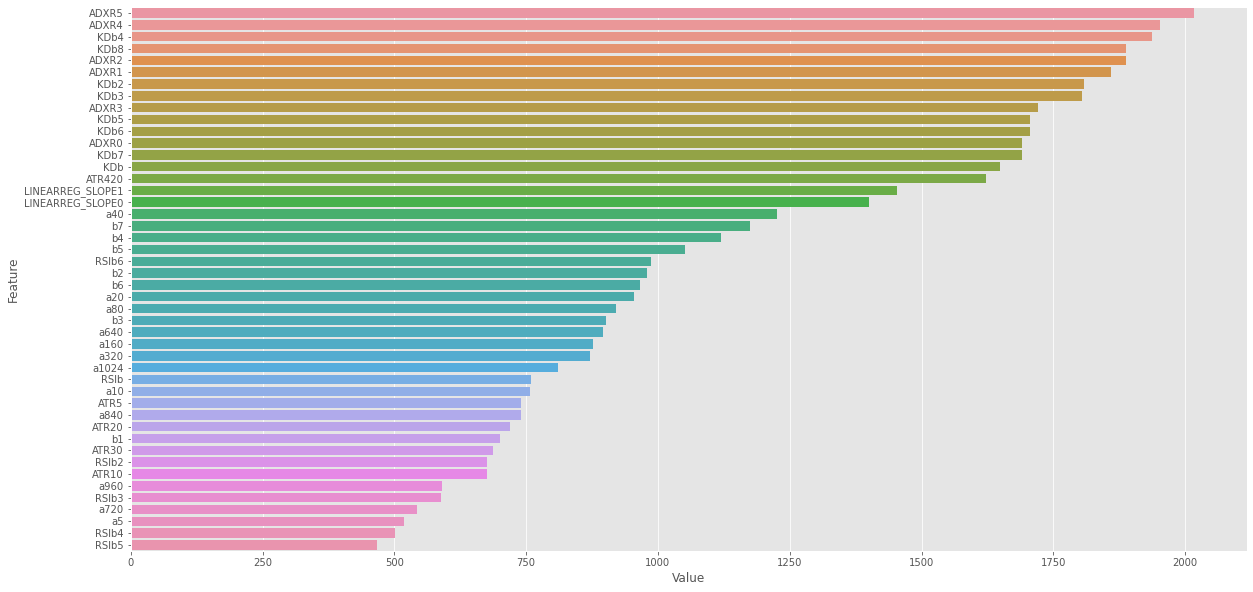

In [87]:
feature_imp = pd.DataFrame(sorted(zip(cf_lgbm.feature_importances_,feature_names)), columns=['Value','Feature'])
feature_imp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

## 回測一下

In [88]:
ey = gs.predict_proba(dataset[feature_names])
ey

array([[0.46973517, 0.53026483],
       [0.46973517, 0.53026483],
       [0.46973517, 0.53026483],
       ...,
       [0.47764583, 0.52235417],
       [0.47764583, 0.52235417],
       [0.47764583, 0.52235417]])

<AxesSubplot:xlabel='date'>

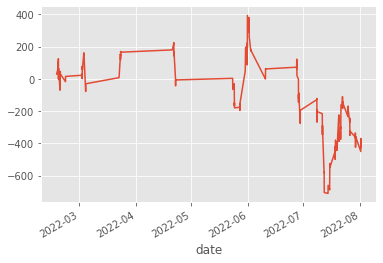

In [86]:
ey = gs.predict_proba(dataset[feature_names])
ey = pd.Series(ey.swapaxes(0,1)[1], index=dataset.index)

eq = twii[dataset.index]
gain = ((eq.shift(-1) - eq))

signal = (ey > ey.quantile(0.75)).rolling(10).sum() > 0
eq = (gain[signal]['2022':]).cumsum()
eq.plot()

## 手續費+滑價

In [17]:
signal['2021'].astype(int).diff().abs().sum() *3

0.0

0.0


<AxesSubplot:>

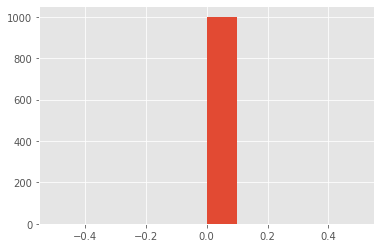

In [18]:
hold_coount = signal['2022':].sum()

samples= []
for i in range(1000):
    ret = np.random.choice(gain['2022':].dropna(),hold_coount).sum()
    # print(ret)
    samples.append(ret)

    
print((pd.Series(samples)>300).sum()/len(samples))
pd.Series(samples).hist()

# U17 Model Interpretation

## Recall and Precision

In [19]:
#from sklearn.metrics import precision_recall_curve
#
#y_true = dataset['return']>1
#y_proba = cf.predict_proba(dataset_test[feature_names])
#y_proba(ey.swapaxes(0,1)[1], index=dataset.index) 
#y_proba

In [20]:
ey

date
2006-01-02 09:00:00    0.5
2006-01-02 09:15:00    0.5
2006-01-02 09:30:00    0.5
2006-01-02 09:45:00    0.5
2006-01-02 10:00:00    0.5
                      ... 
2022-08-02 12:30:00    0.5
2022-08-02 12:45:00    0.5
2022-08-02 13:00:00    0.5
2022-08-02 13:15:00    0.5
2022-08-02 13:30:00    0.5
Length: 77691, dtype: float64

d:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


<AxesSubplot:>

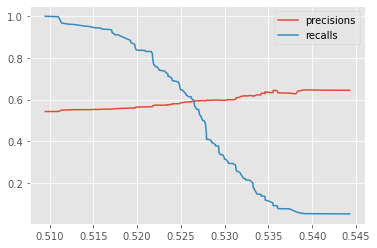

In [54]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset['return']['2016':]>1, ey['2016':],1)

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()


In [22]:
len(dataset['return']['2020':])

11951

## ROC Curve

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dataset['return']['2020':], ey['2020':])

print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 使用 eli5 察看機器學習如何做決定

In [ ]:
import sys
from sklearn.metrics import _scorer
sys.modules['sklearn.metrics.scorer'] = _scorer

from sklearn.feature_selection import _base
sys.modules['sklearn.feature_selection.base'] = _base

import eli5
eli5.explain_prediction_lightgbm(gs, dataset[feature_names].iloc[10])

### 使用Skater來察看機器學習如何做實驗

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
# 新版的skater 不支援 dataset 中有 nan，必須先將有 nan 的 rows 移除喔！
dataset_train_dropna = dataset_train.dropna(how='any')


interpreter = Interpretation(training_data=dataset_train_dropna[feature_names].values[:1000],
                             feature_names=feature_names, training_labels=dataset_train_dropna['return'].values[:1000])
im_model = InMemoryModel(lambda x: gs.predict_proba(x), examples=train[0],
                         target_names=['down', 'rise'])



In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plots = interpreter.feature_importance.plot_feature_importance(im_model, n_jobs=1)

#### 1. 挑幾項出來看

In [ ]:
r = interpreter.partial_dependence.plot_partial_dependence([('ADXR3', 'KDb2')], im_model, n_jobs=1, grid_resolution=10, 
                                                           grid_range=(0,1), n_samples=1000,
                                                           with_variance=False, figsize = (6, 4)) 

#### 分析為何判定會漲？

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(dataset_test[feature_names].values, feature_names=feature_names)

doc_num = 0
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gs.predict_proba).show_in_notebook()


In [ ]:
doc_num = 0
print('Actual Label:', dataset_test['return'].iloc[doc_num])
print('Predicted Label:', gs.predict_proba(dataset_test[feature_names])[0])
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gs.predict_proba).show_in_notebook()


### SHAP 分析package

In [ ]:
import shap
explainer = shap.TreeExplainer(gbm)
X = dataset_test[feature_names][::100]
shap_values = explainer.shap_values(X)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values[1]).head()

In [ ]:
shap.initjs()

doc_id = 100

shap.force_plot(explainer.expected_value[1],
                shap_values[1], feature_names=feature_names)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[1][0], feature_names=feature_names)


## 傳統策略研發

In [ ]:
def backtest(k1, k2, plot=False):
    
    k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=twii.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = twii.shift(-1) - twii
    
    if plot:
        
        returns[hold == 1][:'2021'].cumsum().plot()
    
    return returns[hold == 1][:'2021'].cumsum().iloc[-1]
   

maxr = 0
for k1 in range(40, 100, 1):
    for k2 in range(40, 100, 1):
        if k1 <= k2:
            continue
        r = backtest(k1, k2)
        if r > maxr:
            print(r, k1, k2)
            maxr = r

In [ ]:
backtest(88, 56, True)